## STACK AND 2D-ARRAY

In [1]:
from datetime import datetime
from rich.table import Table
from rich.console import Console
from rich import box
import time
import matplotlib.pyplot as plt

print('MY CALL HISTORY THROUGH STACK AND 2D-ARRAY\n')
# STACK AND 2D-ARRAY
def print_boxed_list(data, call_type):
    console = Console()

    # Set the background color based on call type
    if call_type in ['Incoming (Successful)', 'Outgoing (Successful)']:
        bg_color = "green"
    elif call_type == 'Missed':
        bg_color = "red"
    else:
        bg_color = "cyan"

    table = Table(show_header=False, box=box.ROUNDED)

    # Add a column for each piece of data
    for _ in data:
        table.add_column()

    # Create a row with the appropriate background and text color
    table.add_row(*data, style=f"bright_white on {bg_color}")

    console.print(table)


# Function to extract key-value pairs from a call log entry
def extract_key_value(entry):
    key_value_pairs = {}
    for pair in entry.split(','):
        key, value = pair.split('=')
        key_value_pairs[key.strip()] = value.strip()
    return key_value_pairs


# Function to convert duration to minutes and seconds as a decimal
def format_duration(duration_seconds):
    if not duration_seconds:
        return 'N/A'
    duration_minutes = int(duration_seconds) / 60
    return f"{duration_minutes:.1f} minutes"


def call_status(call_type):
    if call_type == '1':
        return 'Incoming (Successful)'
    elif call_type == '2':
        return 'Outgoing (Successful)'
    elif call_type == '3':
        return 'Missed'
    else:
        return 'Unknown'


# Function to format date and time
def format_date(timestamp):
    if not timestamp:
        return 'N/A'
    dt_object = datetime.fromtimestamp(int(timestamp) / 1000)
    date = dt_object.strftime('%B %d, %Y')
    return f"Date: {date}"


def format_day(timestamp):
    if not timestamp:
        return 'N/A'
    dt_object = datetime.fromtimestamp(int(timestamp) / 1000)
    day_of_week = dt_object.strftime('%A')
    return f"Day: {day_of_week}"


def format_time(timestamp):
    if not timestamp:
        return 'N/A'
    dt_object = datetime.fromtimestamp(int(timestamp) / 1000)
    time = dt_object.strftime('%H:%M')
    return f"Time: {time}"


# Function to peek at the top of the stack and format the output
def peek(stack):
    if stack:
        entry_info = stack[0]
        for item in entry_info:
            if item.startswith('Call Type:'):
                status = item.split(': ')[1]
                break
        print_boxed_list(entry_info, status)
    else:
        print("Stack is empty.")


# Read call log entries from the file
with open("call_logs.txt", "r") as file:
    call_logs_entries = file.readlines()

# Create a stack to store processed call log entries
call_log_stack = [extract_key_value(entry) for entry in call_logs_entries]

# Main processing loop
while True:
    user_input = input("Enter the number of call log entries to process (or 'exit' to quit) [10-653]: ")

    if user_input.lower() == 'exit':
        peek_choice = input("\nDo you want to peek at the latest call log entry before exiting? (yes/no): ").lower()
        if peek_choice == 'yes':
            print("\nLatest entry to be processed:")
            peek(call_information_list)
        break

    try:
        num_entries = int(user_input)
        if num_entries > 653 or num_entries < 10:
            raise ValueError
    except ValueError:
        print("Please enter a valid positive integer.")
        continue
    
    call_information_list = []
    for _ in range(min(num_entries, len(call_log_stack))):
        entry_info = call_log_stack.pop()

        name = entry_info.get('name', 'N/A')
        if name.lower() == 'null':
            name = entry_info.get('number', 'N/A')

        formatted_duration = format_duration(entry_info.get('duration', 'N/A'))
        status = call_status(entry_info.get('type', 'N/A'))
        formatted_date = format_date(entry_info.get('date', 'N/A'))
        formatted_day = format_day(entry_info.get('date', 'N/A'))
        formatted_time = format_time(entry_info.get('date', 'N/A'))

        my_list = [
            f"Name: {name}",
            f"Phone Number: {entry_info.get('number', 'N/A')}",
            formatted_date,
            formatted_day,
            formatted_time,
            f"Duration: {formatted_duration}",
            f"Call Type: {status}"
        ]
        call_information_list.append(my_list)
        print_boxed_list(my_list, status)

MY CALL HISTORY THROUGH STACK AND 2D-ARRAY

Enter the number of call log entries to process (or 'exit' to quit) [10-653]: 10


╭───────────────┬─────────────────┬────────────────┬─────────────┬─────────────┬─────────────────┬────────────────╮
│ Name: Johnlee │ Phone Number:   │ Date: December │ Day: Monday │ Time: 20:01 │ Duration: 0.0   │ Call Type:     │
│               │ 09396327507     │ 11, 2023       │             │             │ minutes         │ Outgoing       │
│               │                 │                │             │             │                 │ (Successful)   │
╰───────────────┴─────────────────┴────────────────┴─────────────┴─────────────┴─────────────────┴────────────────╯

╭────────────────┬────────────────┬────────────────┬─────────────┬─────────────┬─────────────────┬────────────────╮
│ Name: Kuya Gen │ Phone Number:  │ Date: December │ Day: Monday │ Time: 12:06 │ Duration: 0.0   │ Call Type:     │
│                │ +639274863653  │ 11, 2023       │             │             │ minutes         │ Outgoing       │
│                │                │                │             │             │                 │ (Successful)   │
╰────────────────┴────────────────┴────────────────┴─────────────┴─────────────┴─────────────────┴────────────────╯

╭────────────────┬────────────────┬────────────────┬─────────────┬─────────────┬─────────────────┬────────────────╮
│ Name: Kuya Gen │ Phone Number:  │ Date: December │ Day: Monday │ Time: 12:05 │ Duration: 0.0   │ Call Type:     │
│                │ +639274863653  │ 11, 2023       │             │             │ minutes         │ Outgoing       │
│                │                │                │             │             │                 │ (Successful)   │
╰────────────────┴────────────────┴────────────────┴─────────────┴─────────────┴─────────────────┴────────────────╯

╭────────────────┬────────────────┬────────────────┬─────────────┬─────────────┬─────────────────┬────────────────╮
│ Name: Kuya Gen │ Phone Number:  │ Date: December │ Day: Monday │ Time: 12:04 │ Duration: 0.0   │ Call Type:     │
│                │ +639274863653  │ 11, 2023       │             │             │ minutes         │ Outgoing       │
│                │                │                │             │             │                 │ (Successful)   │
╰────────────────┴────────────────┴────────────────┴─────────────┴─────────────┴─────────────────┴────────────────╯

╭─────────────┬─────────────────┬─────────────────┬─────────────┬─────────────┬─────────────────┬─────────────────╮
│ Name: Mommy │ Phone Number:   │ Date: December  │ Day: Monday │ Time: 11:55 │ Duration: 0.9   │ Call Type:      │
│             │ 09235353226     │ 11, 2023        │             │             │ minutes         │ Outgoing        │
│             │                 │                 │             │             │                 │ (Successful)    │
╰─────────────┴─────────────────┴─────────────────┴─────────────┴─────────────┴─────────────────┴─────────────────╯

╭─────────────┬─────────────────┬─────────────────┬─────────────┬─────────────┬─────────────────┬─────────────────╮
│ Name: Mommy │ Phone Number:   │ Date: December  │ Day: Monday │ Time: 11:51 │ Duration: 0.0   │ Call Type:      │
│             │ 09235353226     │ 11, 2023        │             │             │ minutes         │ Outgoing        │
│             │                 │                 │             │             │                 │ (Successful)    │
╰─────────────┴─────────────────┴─────────────────┴─────────────┴─────────────┴─────────────────┴─────────────────╯

╭────────────────┬────────────────┬────────────────┬─────────────┬─────────────┬─────────────────┬────────────────╮
│ Name: Ate      │ Phone Number:  │ Date: December │ Day: Sunday │ Time: 10:34 │ Duration: 0.5   │ Call Type:     │
│ trixy          │ +639955391623  │ 10, 2023       │             │             │ minutes         │ Missed         │
╰────────────────┴────────────────┴────────────────┴─────────────┴─────────────┴─────────────────┴────────────────╯

╭────────────────┬────────────────┬────────────────┬─────────────┬─────────────┬─────────────────┬────────────────╮
│ Name: Ate      │ Phone Number:  │ Date: December │ Day: Sunday │ Time: 09:17 │ Duration: 0.4   │ Call Type:     │
│ trixy          │ +639955391623  │ 10, 2023       │             │             │ minutes         │ Incoming       │
│                │                │                │             │             │                 │ (Successful)   │
╰────────────────┴────────────────┴────────────────┴─────────────┴─────────────┴─────────────────┴────────────────╯

╭─────────────┬─────────────────┬────────────────┬───────────────┬─────────────┬─────────────────┬────────────────╮
│ Name: Mommy │ Phone Number:   │ Date: December │ Day: Saturday │ Time: 21:43 │ Duration: 2.4   │ Call Type:     │
│             │ 09235353226     │ 09, 2023       │               │             │ minutes         │ Outgoing       │
│             │                 │                │               │             │                 │ (Successful)   │
╰─────────────┴─────────────────┴────────────────┴───────────────┴─────────────┴─────────────────┴────────────────╯

╭────────────────┬────────────────┬────────────────┬───────────────┬─────────────┬────────────────┬───────────────╮
│ Name: Kuya Gen │ Phone Number:  │ Date: December │ Day: Saturday │ Time: 21:40 │ Duration: 0.0  │ Call Type:    │
│                │ +639274863653  │ 09, 2023       │               │             │ minutes        │ Outgoing      │
│                │                │                │               │             │                │ (Successful)  │
╰────────────────┴────────────────┴────────────────┴───────────────┴─────────────┴────────────────┴───────────────╯

Enter the number of call log entries to process (or 'exit' to quit) [10-653]: exit

Do you want to peek at the latest call log entry before exiting? (yes/no): yes

Latest entry to be processed:


╭───────────────┬─────────────────┬────────────────┬─────────────┬─────────────┬─────────────────┬────────────────╮
│ Name: Johnlee │ Phone Number:   │ Date: December │ Day: Monday │ Time: 20:01 │ Duration: 0.0   │ Call Type:     │
│               │ 09396327507     │ 11, 2023       │             │             │ minutes         │ Outgoing       │
│               │                 │                │             │             │                 │ (Successful)   │
╰───────────────┴─────────────────┴────────────────┴─────────────┴─────────────┴─────────────────┴────────────────╯

In [2]:
from rich.text import Text
print('MY CALL HISTORY THROUGH SORTING\n')

while True:
    print('''MENU:
[1] Bubble Sort
[2] Selection Sort
[3] Insertion Sort
[4] Exit''')
    while True:
        try:
            sort_type = int(input("Enter the corresponding number of the sorting algorithm you desire [1 - 4]: "))
            if sort_type <= 4 or sort_type >= 1:
                break
            else:
                print("Invalid input. Please enter a number between 1 and 4.")
        except ValueError:
            print("Invalid input. Please enter a valid number.")

    if sort_type == 4:
        break

    print('''\n[1] Ascending Order
[2] Descending Order''')

    while True:
        try:
            order_type = int(input("Enter the corresponding number of the sorting algorithm you desire [1/2]: "))
            if order_type == 2 or order_type == 1:
                break
            else:
                print("Invalid input. Please enter a number between 1 and 2.")
        except ValueError:
            print("Invalid input. Please enter a valid number.")
            

    def print_boxed_sub_list(data):
        table = Table(show_header=False)

        for cell in data:
            # Splitting the cell content to separate the name and time
            parts = cell.rsplit(', ', 1)
            name_part = parts[0]
            time_part = parts[1] if len(parts) > 1 else ''

            # Creating styled text with the time part in bold
            styled_text = Text(name_part, style="none") + ", " + Text(time_part, style="bold")
            table.add_row(styled_text)

        console = Console()
        console.print(table)


    def time_from_string(time_str):
        return datetime.strptime(time_str, '%H:%M').time()


    data = call_information_list.copy()
    if sort_type == 1:
        if order_type == 1:
            def bubble_sort(array):
                n = min(len(array), 10)
                for i in range(n):
                    for j in range(0, n-i-1):
                        time1 = time_from_string(array[j][4].split(" ")[1])
                        time2 = time_from_string(array[j+1][4].split(" ")[1])

                        if time1 > time2:
                            array[j], array[j+1] = array[j+1], call_information_list[j]
                            sub_list = []
                            for entry in array:
                                item = f'{entry[0]}, {entry[4]}'
                                sub_list.append(item)
                            print_boxed_sub_list(sub_list)
                            time.sleep(1)


            # After processing the call logs
            bubble_sort(data)

            # Print the sorted call logs
            print("\nSorted List\n")
            for datum in data:
                print_boxed_list(datum, datum[-1].split(": ")[1])
                
        elif order_type == 2:
            def bubble_sort(array):
                n = min(len(array), 10)
                for i in range(n):
                    for j in range(0, n-i-1):
                        time1 = time_from_string(array[j][4].split(" ")[1])
                        time2 = time_from_string(array[j+1][4].split(" ")[1])

                        if time1 < time2:
                            array[j], array[j+1] = array[j+1], array[j]
                            sub_list = []
                            sub_list = [f'{entry[0]}, {entry[4]}' for entry in array[:n]]
                            print_boxed_sub_list(sub_list)
                            time.sleep(1)

            bubble_sort(data)

            # Print the sorted call logs
            for datum in data:
                print_boxed_list(datum, datum[-1].split(": ")[1])
    
    elif sort_type == 2:
        if order_type == 1:
            def selection_sort(array):
                n = min(len(array), 10)
                for i in range(n):
                    min_idx = i
                    for j in range(i+1, n):
                        time1 = time_from_string(array[min_idx][4].split(" ")[1])
                        time2 = time_from_string(array[j][4].split(" ")[1])

                        if time1 > time2:
                            min_idx = j

                    # Swap the found minimum element with the first element
                    array[i], array[min_idx] = array[min_idx], array[i]
                    sub_list = []
                    for entry in array:
                        item = f'{entry[0]}, {entry[4]}'
                        sub_list.append(item)
                    print_boxed_sub_list(sub_list)
                    time.sleep(1)

            selection_sort(data)

            # Print the sorted call logs
            for datum in data:
                print_boxed_list(datum, datum[-1].split(": ")[1])
                
        elif order_type == 2:
            def selection_sort(array):
                n = min(len(array), 10)

                for i in range(n):
                    max_idx = i
                    for j in range(i+1, n):
                        time1 = time_from_string(array[max_idx][4].split(" ")[1])
                        time2 = time_from_string(array[j][4].split(" ")[1])

                        if time1 < time2:
                            max_idx = j

                    # Swap the found maximum element with the first element
                    array[i], array[max_idx] = array[max_idx], array[i]
                    sub_list = []
                    for entry in array:
                        item = f'{entry[0]}, {entry[4]}'
                        sub_list.append(item)
                    print_boxed_sub_list(sub_list)
                    time.sleep(1)

            selection_sort(data)

            # Print the sorted call logs
            for datum in data:
                print_boxed_list(datum, datum[-1].split(": ")[1])
                
    elif sort_type == 3:
        if order_type == 1:
            def insertion_sort(array):
                n = min(len(array), 10)

                for i in range(1, n):
                    key_item = array[i]
                    key_time = time_from_string(key_item[4].split(" ")[1])
                    j = i - 1

                    # Move elements of sorted_list[0..i-1] that are greater than key to one position ahead
                    while j >= 0 and time_from_string(array[j][4].split(" ")[1]) > key_time:
                        array[j + 1] = array[j]
                        j -= 1
                    array[j + 1] = key_item
                    sub_list = []
                    for entry in array:
                        item = f'{entry[0]}, {entry[4]}'
                        sub_list.append(item)
                    print_boxed_sub_list(sub_list)
                    time.sleep(1)

            insertion_sort(data)

            # Print the sorted call logs
            for datum in data:
                print_boxed_list(datum, datum[-1].split(": ")[1])
                
        elif order_type == 2:
            def insertion_sort_descending(array):
                n = min(len(array), 10)

                for i in range(1, n):
                    key_item = array[i]
                    key_time = time_from_string(key_item[4].split(" ")[1])
                    j = i - 1

                    # Move elements of sorted_list[0..i-1] that are smaller than key to one position ahead
                    while j >= 0 and time_from_string(array[j][4].split(" ")[1]) < key_time:
                        array[j + 1] = array[j]
                        j -= 1
                    array[j + 1] = key_item
                    sub_list = []
                    for entry in array:
                        item = f'{entry[0]}, {entry[4]}'
                        sub_list.append(item)
                    print_boxed_sub_list(sub_list)
                    time.sleep(1)

            insertion_sort(data)

            # Print the sorted call logs
            for datum in data:
                print_boxed_list(datum, datum[-1].split(": ")[1])

MY CALL HISTORY THROUGH SORTING

MENU:
[1] Bubble Sort
[2] Selection Sort
[3] Insertion Sort
[4] Exit
Enter the corresponding number of the sorting algorithm you desire [1 - 4]: 1

[1] Ascending Order
[2] Descending Order
Enter the corresponding number of the sorting algorithm you desire [1/2]: 1


┌──────────────────────────────┐
│ Name: Kuya Gen, Time: 12:06  │
│ Name: Johnlee, Time: 20:01   │
│ Name: Kuya Gen, Time: 12:05  │
│ Name: Kuya Gen, Time: 12:04  │
│ Name: Mommy, Time: 11:55     │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Mommy, Time: 21:43     │
│ Name: Kuya Gen, Time: 21:40  │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Kuya Gen, Time: 12:06  │
│ Name: Kuya Gen, Time: 12:05  │
│ Name: Kuya Gen, Time: 12:06  │
│ Name: Kuya Gen, Time: 12:04  │
│ Name: Mommy, Time: 11:55     │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Mommy, Time: 21:43     │
│ Name: Kuya Gen, Time: 21:40  │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Kuya Gen, Time: 12:06  │
│ Name: Kuya Gen, Time: 12:05  │
│ Name: Kuya Gen, Time: 12:04  │
│ Name: Kuya Gen, Time: 12:05  │
│ Name: Mommy, Time: 11:55     │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Mommy, Time: 21:43     │
│ Name: Kuya Gen, Time: 21:40  │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Kuya Gen, Time: 12:06  │
│ Name: Kuya Gen, Time: 12:05  │
│ Name: Kuya Gen, Time: 12:04  │
│ Name: Mommy, Time: 11:55     │
│ Name: Kuya Gen, Time: 12:04  │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Mommy, Time: 21:43     │
│ Name: Kuya Gen, Time: 21:40  │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Kuya Gen, Time: 12:06  │
│ Name: Kuya Gen, Time: 12:05  │
│ Name: Kuya Gen, Time: 12:04  │
│ Name: Mommy, Time: 11:55     │
│ Name: Mommy, Time: 11:51     │
│ Name: Mommy, Time: 11:55     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Mommy, Time: 21:43     │
│ Name: Kuya Gen, Time: 21:40  │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Kuya Gen, Time: 12:06  │
│ Name: Kuya Gen, Time: 12:05  │
│ Name: Kuya Gen, Time: 12:04  │
│ Name: Mommy, Time: 11:55     │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Mommy, Time: 21:43     │
│ Name: Kuya Gen, Time: 21:40  │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Kuya Gen, Time: 12:06  │
│ Name: Kuya Gen, Time: 12:05  │
│ Name: Kuya Gen, Time: 12:04  │
│ Name: Mommy, Time: 11:55     │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Mommy, Time: 21:43     │
│ Name: Kuya Gen, Time: 21:40  │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Kuya Gen, Time: 12:06  │
│ Name: Kuya Gen, Time: 12:05  │
│ Name: Kuya Gen, Time: 12:04  │
│ Name: Mommy, Time: 11:55     │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Kuya Gen, Time: 12:05  │
│ Name: Johnlee, Time: 20:01   │
│ Name: Kuya Gen, Time: 12:04  │
│ Name: Mommy, Time: 11:55     │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Kuya Gen, Time: 12:05  │
│ Name: Kuya Gen, Time: 12:04  │
│ Name: Kuya Gen, Time: 12:06  │
│ Name: Mommy, Time: 11:55     │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Kuya Gen, Time: 12:05  │
│ Name: Kuya Gen, Time: 12:04  │
│ Name: Mommy, Time: 11:55     │
│ Name: Kuya Gen, Time: 12:05  │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Kuya Gen, Time: 12:05  │
│ Name: Kuya Gen, Time: 12:04  │
│ Name: Mommy, Time: 11:55     │
│ Name: Mommy, Time: 11:51     │
│ Name: Kuya Gen, Time: 12:04  │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Kuya Gen, Time: 12:05  │
│ Name: Kuya Gen, Time: 12:04  │
│ Name: Mommy, Time: 11:55     │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Mommy, Time: 11:55     │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Kuya Gen, Time: 12:05  │
│ Name: Kuya Gen, Time: 12:04  │
│ Name: Mommy, Time: 11:55     │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Kuya Gen, Time: 12:05  │
│ Name: Kuya Gen, Time: 12:04  │
│ Name: Mommy, Time: 11:55     │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Kuya Gen, Time: 12:04  │
│ Name: Johnlee, Time: 20:01   │
│ Name: Mommy, Time: 11:55     │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Kuya Gen, Time: 12:04  │
│ Name: Mommy, Time: 11:55     │
│ Name: Kuya Gen, Time: 12:06  │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Kuya Gen, Time: 12:04  │
│ Name: Mommy, Time: 11:55     │
│ Name: Mommy, Time: 11:51     │
│ Name: Kuya Gen, Time: 12:05  │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Kuya Gen, Time: 12:04  │
│ Name: Mommy, Time: 11:55     │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 12:04  │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Kuya Gen, Time: 12:04  │
│ Name: Mommy, Time: 11:55     │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Mommy, Time: 11:55     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Kuya Gen, Time: 12:04  │
│ Name: Mommy, Time: 11:55     │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Kuya Gen, Time: 12:04  │
│ Name: Mommy, Time: 11:55     │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Mommy, Time: 11:55     │
│ Name: Johnlee, Time: 20:01   │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Mommy, Time: 11:55     │
│ Name: Mommy, Time: 11:51     │
│ Name: Kuya Gen, Time: 12:06  │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Mommy, Time: 11:55     │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 12:05  │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Mommy, Time: 11:55     │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Kuya Gen, Time: 12:04  │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Mommy, Time: 11:55     │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Mommy, Time: 11:55     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Mommy, Time: 11:55     │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Mommy, Time: 11:51     │
│ Name: Johnlee, Time: 20:01   │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 12:06  │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Kuya Gen, Time: 12:05  │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 12:04  │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Mommy, Time: 11:55     │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Ate trixy, Time: 10:34 │
│ Name: Johnlee, Time: 20:01   │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Mommy, Time: 11:55     │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Kuya Gen, Time: 12:06  │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Mommy, Time: 11:55     │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 12:05  │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Mommy, Time: 11:55     │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 09:17 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 12:04  │
│ Name: Mommy, Time: 11:55     │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Ate trixy, Time: 09:17 │
│ Name: Johnlee, Time: 20:01   │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 12:04  │
│ Name: Mommy, Time: 11:55     │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Ate trixy, Time: 09:17 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 12:06  │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 12:04  │
│ Name: Mommy, Time: 11:55     │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘

┌──────────────────────────────┐
│ Name: Ate trixy, Time: 09:17 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 12:05  │
│ Name: Kuya Gen, Time: 12:04  │
│ Name: Mommy, Time: 11:55     │
│ Name: Mommy, Time: 11:51     │
│ Name: Ate trixy, Time: 10:34 │
│ Name: Kuya Gen, Time: 21:40  │
│ Name: Mommy, Time: 21:43     │
└──────────────────────────────┘


Sorted List



╭────────────────┬────────────────┬────────────────┬─────────────┬─────────────┬─────────────────┬────────────────╮
│ Name: Ate      │ Phone Number:  │ Date: December │ Day: Sunday │ Time: 09:17 │ Duration: 0.4   │ Call Type:     │
│ trixy          │ +639955391623  │ 10, 2023       │             │             │ minutes         │ Incoming       │
│                │                │                │             │             │                 │ (Successful)   │
╰────────────────┴────────────────┴────────────────┴─────────────┴─────────────┴─────────────────┴────────────────╯

╭────────────────┬────────────────┬────────────────┬─────────────┬─────────────┬─────────────────┬────────────────╮
│ Name: Ate      │ Phone Number:  │ Date: December │ Day: Sunday │ Time: 10:34 │ Duration: 0.5   │ Call Type:     │
│ trixy          │ +639955391623  │ 10, 2023       │             │             │ minutes         │ Missed         │
╰────────────────┴────────────────┴────────────────┴─────────────┴─────────────┴─────────────────┴────────────────╯

╭────────────────┬────────────────┬────────────────┬─────────────┬─────────────┬─────────────────┬────────────────╮
│ Name: Ate      │ Phone Number:  │ Date: December │ Day: Sunday │ Time: 10:34 │ Duration: 0.5   │ Call Type:     │
│ trixy          │ +639955391623  │ 10, 2023       │             │             │ minutes         │ Missed         │
╰────────────────┴────────────────┴────────────────┴─────────────┴─────────────┴─────────────────┴────────────────╯

╭────────────────┬────────────────┬────────────────┬─────────────┬─────────────┬─────────────────┬────────────────╮
│ Name: Kuya Gen │ Phone Number:  │ Date: December │ Day: Monday │ Time: 12:05 │ Duration: 0.0   │ Call Type:     │
│                │ +639274863653  │ 11, 2023       │             │             │ minutes         │ Outgoing       │
│                │                │                │             │             │                 │ (Successful)   │
╰────────────────┴────────────────┴────────────────┴─────────────┴─────────────┴─────────────────┴────────────────╯

╭────────────────┬────────────────┬────────────────┬─────────────┬─────────────┬─────────────────┬────────────────╮
│ Name: Kuya Gen │ Phone Number:  │ Date: December │ Day: Monday │ Time: 12:04 │ Duration: 0.0   │ Call Type:     │
│                │ +639274863653  │ 11, 2023       │             │             │ minutes         │ Outgoing       │
│                │                │                │             │             │                 │ (Successful)   │
╰────────────────┴────────────────┴────────────────┴─────────────┴─────────────┴─────────────────┴────────────────╯

╭─────────────┬─────────────────┬─────────────────┬─────────────┬─────────────┬─────────────────┬─────────────────╮
│ Name: Mommy │ Phone Number:   │ Date: December  │ Day: Monday │ Time: 11:55 │ Duration: 0.9   │ Call Type:      │
│             │ 09235353226     │ 11, 2023        │             │             │ minutes         │ Outgoing        │
│             │                 │                 │             │             │                 │ (Successful)    │
╰─────────────┴─────────────────┴─────────────────┴─────────────┴─────────────┴─────────────────┴─────────────────╯

╭─────────────┬─────────────────┬─────────────────┬─────────────┬─────────────┬─────────────────┬─────────────────╮
│ Name: Mommy │ Phone Number:   │ Date: December  │ Day: Monday │ Time: 11:51 │ Duration: 0.0   │ Call Type:      │
│             │ 09235353226     │ 11, 2023        │             │             │ minutes         │ Outgoing        │
│             │                 │                 │             │             │                 │ (Successful)    │
╰─────────────┴─────────────────┴─────────────────┴─────────────┴─────────────┴─────────────────┴─────────────────╯

╭────────────────┬────────────────┬────────────────┬─────────────┬─────────────┬─────────────────┬────────────────╮
│ Name: Ate      │ Phone Number:  │ Date: December │ Day: Sunday │ Time: 10:34 │ Duration: 0.5   │ Call Type:     │
│ trixy          │ +639955391623  │ 10, 2023       │             │             │ minutes         │ Missed         │
╰────────────────┴────────────────┴────────────────┴─────────────┴─────────────┴─────────────────┴────────────────╯

╭────────────────┬────────────────┬────────────────┬───────────────┬─────────────┬────────────────┬───────────────╮
│ Name: Kuya Gen │ Phone Number:  │ Date: December │ Day: Saturday │ Time: 21:40 │ Duration: 0.0  │ Call Type:    │
│                │ +639274863653  │ 09, 2023       │               │             │ minutes        │ Outgoing      │
│                │                │                │               │             │                │ (Successful)  │
╰────────────────┴────────────────┴────────────────┴───────────────┴─────────────┴────────────────┴───────────────╯

╭─────────────┬─────────────────┬────────────────┬───────────────┬─────────────┬─────────────────┬────────────────╮
│ Name: Mommy │ Phone Number:   │ Date: December │ Day: Saturday │ Time: 21:43 │ Duration: 2.4   │ Call Type:     │
│             │ 09235353226     │ 09, 2023       │               │             │ minutes         │ Outgoing       │
│             │                 │                │               │             │                 │ (Successful)   │
╰─────────────┴─────────────────┴────────────────┴───────────────┴─────────────┴─────────────────┴────────────────╯

MENU:
[1] Bubble Sort
[2] Selection Sort
[3] Insertion Sort
[4] Exit
Enter the corresponding number of the sorting algorithm you desire [1 - 4]: 4


# Call Frequency Analysis by Day of the Week - A Comparison Between Year 2022 and Year 2023

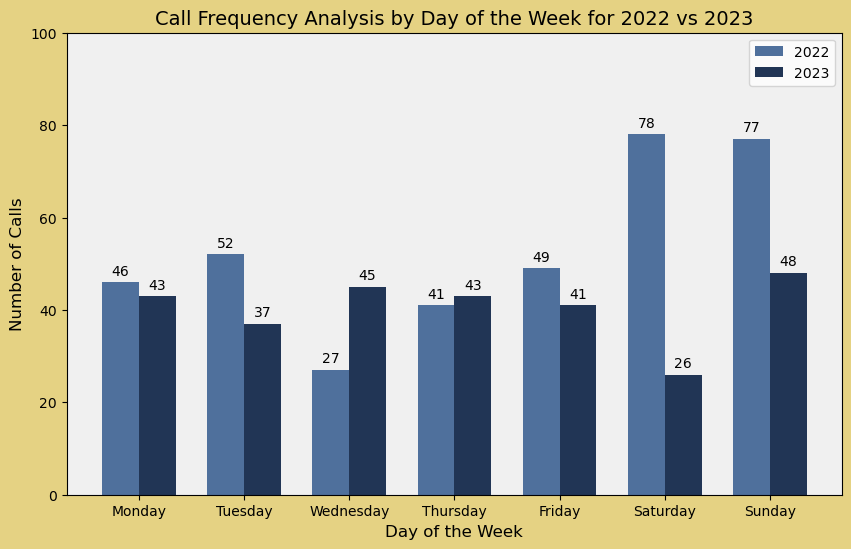

In [3]:
# Create dictionaries to store the count of calls for each day of the week in 2022 and 2023
day_of_week_counts_2022 = {'Monday': 0, 'Tuesday': 0, 'Wednesday': 0, 'Thursday': 0, 'Friday': 0, 'Saturday': 0, 'Sunday': 0}
day_of_week_counts_2023 = {'Monday': 0, 'Tuesday': 0, 'Wednesday': 0, 'Thursday': 0, 'Friday': 0, 'Saturday': 0, 'Sunday': 0}

# Process call log entries and update the dictionaries
for entry in call_logs_entries:
    entry_info = extract_key_value(entry)
    date_time = entry_info.get('date', 'N/A')

    if date_time != 'N/A':
        dt_object = datetime.fromtimestamp(int(date_time) / 1000)
        year = dt_object.year
        day_of_week = dt_object.strftime('%A')
        if year == 2022:
            day_of_week_counts_2022[day_of_week] += 1
        elif year == 2023:
            day_of_week_counts_2023[day_of_week] += 1

# Prepare data for the bar graph
days = list(day_of_week_counts_2022.keys())
calls_2022 = list(day_of_week_counts_2022.values())
calls_2023 = list(day_of_week_counts_2023.values())

# Plot the comparison bar graph
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35  # width of the bars

# Create bars for 2022 and 2023
bars_2022 = ax.bar([x - width/2 for x in range(len(days))], calls_2022, width, label='2022', color='#4F709C')
bars_2023 = ax.bar([x + width/2 for x in range(len(days))], calls_2023, width, label='2023', color='#213555')
fig.set_facecolor('#E5D283')
ax.set_facecolor('#F0F0F0')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Day of the Week', fontsize=12)
ax.set_ylabel('Number of Calls', fontsize=12)
ax.set_title('Call Frequency Analysis by Day of the Week for 2022 vs 2023', fontsize=14)
ax.set_ylim(0, 100)
ax.set_xticks(range(len(days)))
ax.set_xticklabels(days)
ax.legend()

# Add labels on each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        

add_labels(bars_2022)
add_labels(bars_2023)

plt.show()


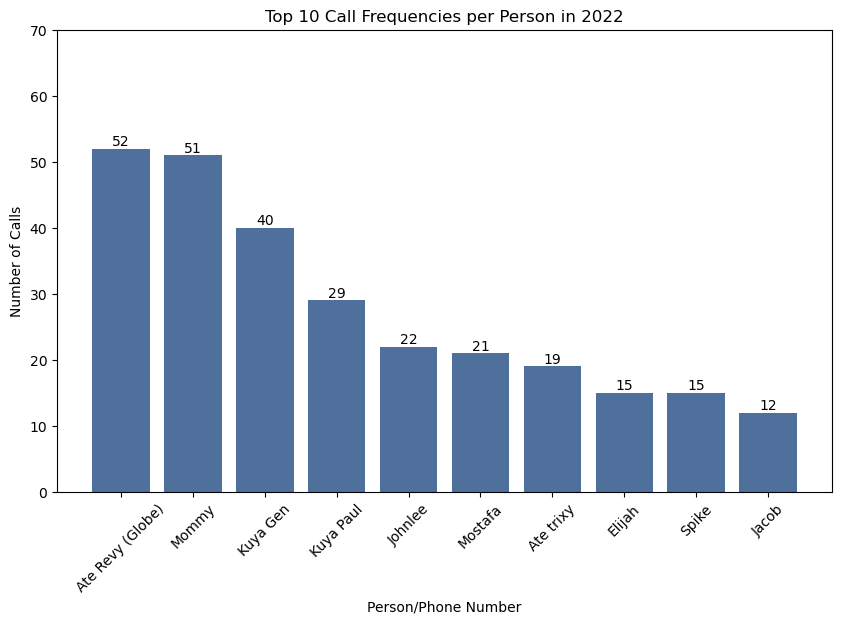

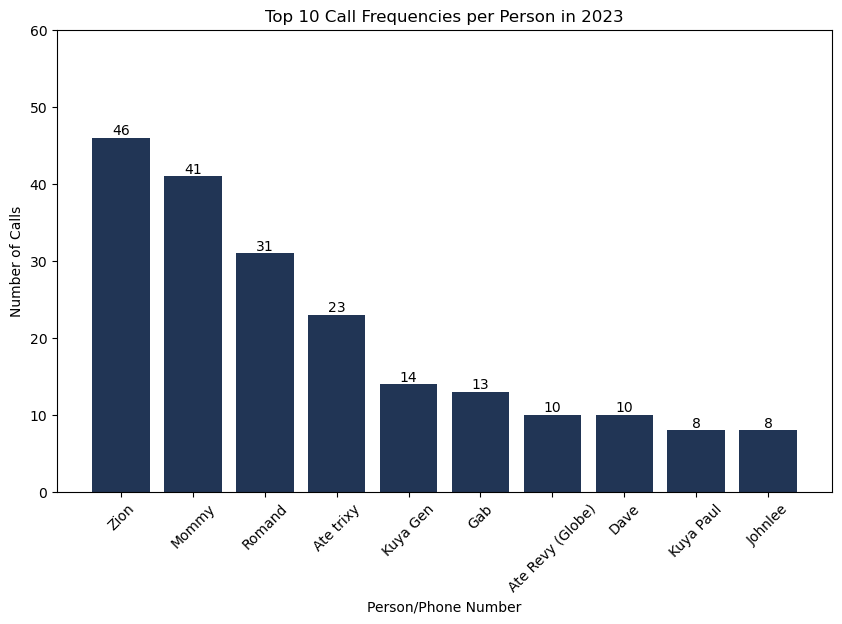

In [6]:
from collections import defaultdict
from datetime import datetime
import matplotlib.pyplot as plt

call_frequency_2022 = defaultdict(int)
call_frequency_2023 = defaultdict(int)

for entry in call_log_stack:
    date_time = entry.get('date', 'N/A')
    if date_time != 'N/A':
        dt_object = datetime.fromtimestamp(int(date_time) / 1000)
        year = dt_object.year

        # Use phone number if name is 'null', missing, or empty
        name = entry.get('name', '').strip()
        if not name or name.lower() == 'null':
            name = entry.get('number', 'Unknown')

        if year == 2022:
            call_frequency_2022[name] += 1
        elif year == 2023:
            call_frequency_2023[name] += 1

top_10_2022 = sorted(call_frequency_2022.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_2023 = sorted(call_frequency_2023.items(), key=lambda x: x[1], reverse=True)[:10]

# Plot for 2022
people_2022, calls_2022 = zip(*top_10_2022) if top_10_2022 else ([], [])
plt.figure(figsize=(10, 6))
bars_2022 = plt.bar(people_2022, calls_2022, color='#4F709C')
plt.xlabel('Person/Phone Number')
plt.ylabel('Number of Calls')
plt.title('Top 10 Call Frequencies per Person in 2022')
plt.ylim(0, 70)
plt.xticks(rotation=45)
# Adding labels directly in the loop for 2022
for bar in bars_2022:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

# Plot for 2023
people_2023, calls_2023 = zip(*top_10_2023) if top_10_2023 else ([], [])
plt.figure(figsize=(10, 6))
bars_2023 = plt.bar(people_2023, calls_2023, color='#213555')
plt.xlabel('Person/Phone Number')
plt.ylabel('Number of Calls')
plt.title('Top 10 Call Frequencies per Person in 2023')
plt.ylim(0, 60)
plt.xticks(rotation=45)
# Adding labels directly in the loop for 2023
for bar in bars_2023:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()


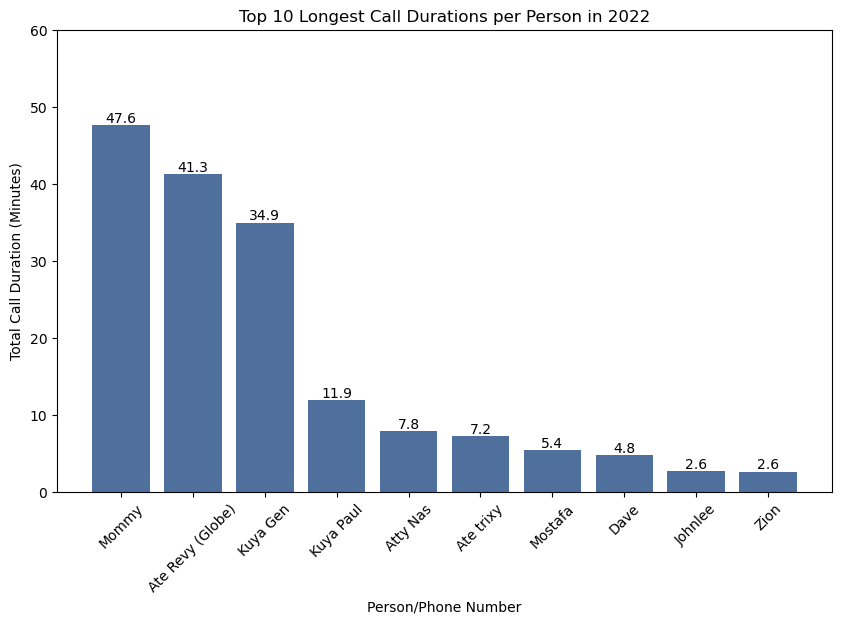

In [4]:
from collections import defaultdict
from datetime import datetime

# Initialize a dictionary to accumulate call durations (in minutes) for each person in 2022
call_duration_2022 = defaultdict(int)

# Process each entry in the call log
for entry in call_log_stack:
    date_time = entry.get('date', 'N/A')
    duration_seconds = entry.get('duration', 0)  # Assuming duration is in seconds

    if date_time != 'N/A':
        dt_object = datetime.fromtimestamp(int(date_time) / 1000)
        year = dt_object.year

        # Use phone number if name is 'null', missing, or empty
        name = entry.get('name', '').strip()
        if not name or name.lower() == 'null':
            name = entry.get('number', 'Unknown')

        if year == 2022:
            # Convert duration from seconds to minutes
            call_duration_2022[name] += int(duration_seconds) / 60

# Find top 10 people with the longest call durations in 2022
top_10_duration_2022 = sorted(call_duration_2022.items(), key=lambda x: x[1], reverse=True)[:10]

import matplotlib.pyplot as plt

# Separate the data for plotting
people_duration_2022, durations_2022 = zip(*top_10_duration_2022) if top_10_duration_2022 else ([], [])

# Plotting the bar graph for 2022
plt.figure(figsize=(10, 6))
bars_duration_2022 = plt.bar(people_duration_2022, durations_2022, color='#4F709C')
plt.xlabel('Person/Phone Number')
plt.ylabel('Total Call Duration (Minutes)')
plt.title('Top 10 Longest Call Durations per Person in 2022')
plt.ylim(0, 60)
plt.xticks(rotation=45)

# Adding labels for durations
for bar in bars_duration_2022:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', va='bottom', ha='center')

plt.show()


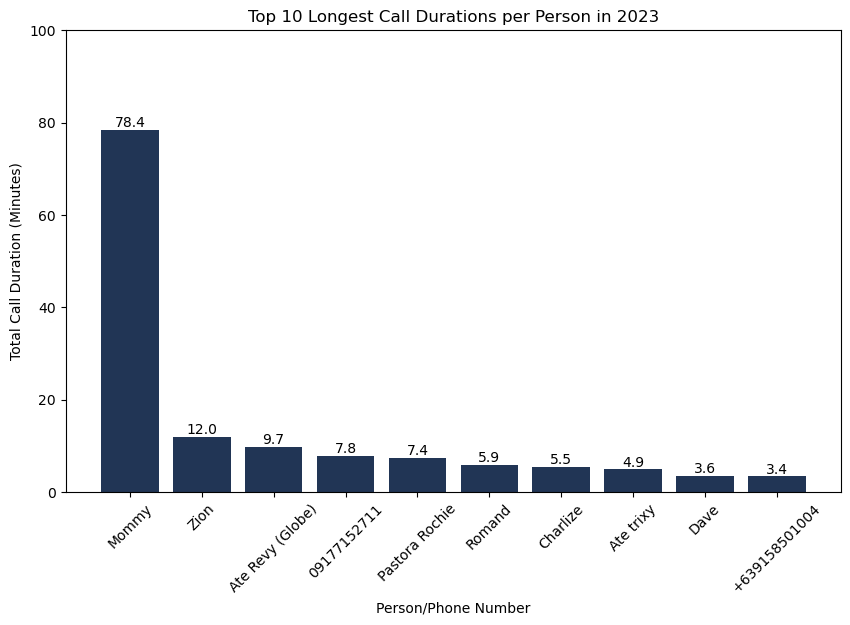

In [6]:
# Initialize a dictionary to accumulate call durations (in minutes) for each person in 2023
call_duration_2023 = defaultdict(int)

# Process each entry in the call log
for entry in call_log_stack:
    date_time = entry.get('date', 'N/A')
    duration_seconds = entry.get('duration', 0)  # Assuming duration is in seconds

    if date_time != 'N/A':
        dt_object = datetime.fromtimestamp(int(date_time) / 1000)
        year = dt_object.year

        # Use phone number if name is 'null', missing, or empty
        name = entry.get('name', '').strip()
        if not name or name.lower() == 'null':
            name = entry.get('number', 'Unknown')

        if year == 2023:
            # Convert duration from seconds to minutes
            call_duration_2023[name] += int(duration_seconds) / 60

# Find top 10 people with the longest call durations in 2023
top_10_duration_2023 = sorted(call_duration_2023.items(), key=lambda x: x[1], reverse=True)[:10]

# Separate the data for plotting
people_duration_2023, durations_2023 = zip(*top_10_duration_2023) if top_10_duration_2023 else ([], [])

# Plotting the bar graph for 2023
plt.figure(figsize=(10, 6))
bars_duration_2023 = plt.bar(people_duration_2023, durations_2023, color='#213555')
plt.xlabel('Person/Phone Number')
plt.ylabel('Total Call Duration (Minutes)')
plt.title('Top 10 Longest Call Durations per Person in 2023')
plt.ylim(0, 100)
plt.xticks(rotation=45)

# Adding labels for durations
for bar in bars_duration_2023:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', va='bottom', ha='center')

plt.show()